## Pendahuluan

Pada kesempatan kali ini saya akan mencoba memprediksi survival penumpang kapal Titanic dengan menggunakan model KNN.

Info lengkap dari kasus ini dapat dilihat pada situs berikut : <a href="https://www.kaggle.com/c/titanic/data">Titanic - Machine Learning from Disaster</a>

### Konten : 
<ol>
    <li>Load library yang akan dibutuhkan</li>
    <li>Explorasi data</li>
    <li>Analisis data</li>
    <li>Visualisasi data</li>
    <li>Pembersihan (cleaning) data</li>
    <li>Pembuatan model KNN</li>
</ol>

## 1. Load library yang dibutuhkan

Load library python yang dibutuhkan seperti numpy, pandas, matplotlib, dan seaborn 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

## 2. Explorasi data

Pada bagian ini kita akan meng-explore dataset Titanic

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Pertama kita cari informasi apa yang bisa kita dapat dari kedua dataset yang telah di-load sebelumnya

In [3]:
train_data.info()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-nu

### Decribe data train

In [4]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McGovern, Miss. Mary",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Decribe data test

In [5]:
test_data.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Andersson, Miss. Ida Augusta Margareta",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


## 3. Analisis data

Pada bagian ini kita akan menganalisis data berdasarkan informasi yang telah kita dapat sebelumnya

Pertama saya ingin melihat beberapa baris data pada dataset train dan test

In [6]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Bisa dilihat bahwa terdapat beberapa data yang tidak memiliki nilai (null)

Mari kita cek apa saja dan berapa banyak data yang bernilai null tersebut

### Cek null data train

In [8]:
pd.isnull(train_data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
age_null = (train_data['Age'].isnull().sum() / train_data['Age'].count()) * 100
cabin_null = (train_data['Cabin'].isnull().sum() / 891) * 100 
embarked_null = (train_data['Embarked'].isnull().sum() / train_data['Embarked'].count()) * 100 

print('Persentase data Age yang null: {0:.2f}% \nPersentase data Cabin yang null: {1:.2f}% \nPersentase data Embarked yang null: {2:.2f}% '.format(age_null, cabin_null,embarked_null))

Persentase data Age yang null: 24.79% 
Persentase data Cabin yang null: 77.10% 
Persentase data Embarked yang null: 0.22% 


### Cek null data test

In [10]:
pd.isnull(test_data).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
age_null = (test_data['Age'].isnull().sum() / test_data['Age'].count()) * 100
cabin_null = (test_data['Cabin'].isnull().sum() / 418) * 100 
print('Persentase data Age yang null: {0:.2f}% \nPersentase data Cabin yang null: {1:.2f}%'.format(age_null, cabin_null))

Persentase data Age yang null: 25.90% 
Persentase data Cabin yang null: 78.23%


Data Cabin memiliki banyak nilai null sehingga kita dapat drop kolom tersebut karena banyak data yang kosong

Sedangkan Age dan Embarked akan kita isi 

## 4. Visualisasi data

Pada bagian ini kita akan men-visualisasikan data sehingga mudah untuk dipahami dan dianalisis lebih lanjut

Mari kita cek korelasi antara beberapa fitur yang ada terhadap prediksi survive penumpang

### Jenis kelamin terhadap survival

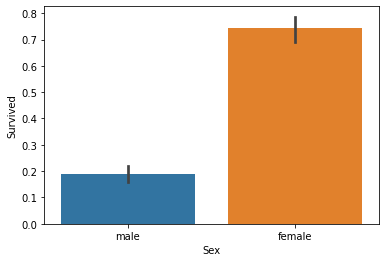

In [12]:
sns.barplot(x='Sex', y='Survived', data=train_data)

In [13]:
print("Persentase perempuan selamat: {0:.2f}%".format(train_data["Survived"][train_data["Sex"] == 'female'].value_counts(normalize=True)[1]*100))
print("Persentase laki-laki selamat: {0:.2f}%".format(train_data["Survived"][train_data["Sex"] == 'male'].value_counts(normalize=True)[1]*100))


Persentase perempuan selamat: 74.20%
Persentase laki-laki selamat: 18.89%


Perempuan memiliki peluang selamat lebih besar dari laki-laki, sehingga dapat disimpulkan bahwa jenis kelamin mempengaruhi keselamatan

### Kelas penumpang terhadap keselamatan

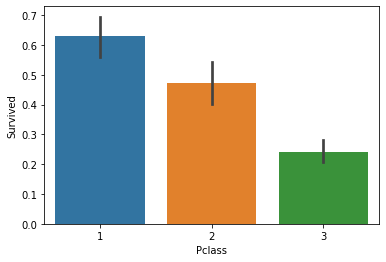

In [14]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

In [15]:
print("Persentase kelas 1 selamat: {0:.2f}%".format(train_data["Survived"][train_data["Pclass"] == 1].value_counts(normalize=True)[1]*100))
print("Persentase kelas 2 selamat: {0:.2f}%".format(train_data["Survived"][train_data["Pclass"] == 2].value_counts(normalize=True)[1]*100))
print("Persentase kelas 3 selamat: {0:.2f}%".format(train_data["Survived"][train_data["Pclass"] == 3].value_counts(normalize=True)[1]*100))

Persentase kelas 1 selamat: 62.96%
Persentase kelas 2 selamat: 47.28%
Persentase kelas 3 selamat: 24.24%


Ternyata kelas penumpang juga mempengaruhi keselamatan, dapat diasumsikan semakin tinggi kelasnya maka peluang selamatnya semakin besar

### Jumlah saudara penumpang terhadap keselamatan

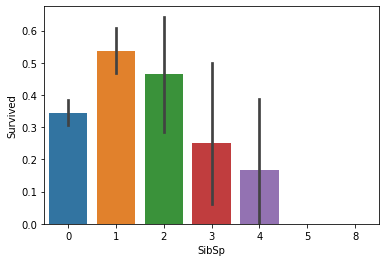

In [16]:
sns.barplot(x='SibSp', y='Survived', data=train_data)

In [17]:
print("Persentase saudara = 0 yang selamat:", train_data["Survived"][train_data["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Persentase saudara = 1 yang selamat:", train_data["Survived"][train_data["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Persentase saudara = 2 yang selamat:", train_data["Survived"][train_data["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Persentase saudara = 3 yang selamat:", train_data["Survived"][train_data["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("Persentase saudara = 4 yang selamat:", train_data["Survived"][train_data["SibSp"] == 4].value_counts(normalize = True)[1]*100)

Persentase saudara = 0 yang selamat: 34.53947368421053
Persentase saudara = 1 yang selamat: 53.588516746411486
Persentase saudara = 2 yang selamat: 46.42857142857143
Persentase saudara = 3 yang selamat: 25.0
Persentase saudara = 4 yang selamat: 16.666666666666664


Penumpang dengan jumlah saudara sebanyak 1 atau 2 memiliki peluang keselamatan cukup tinggi

### Jumlah orang tua atau anak penumpang terhadap keselamatan

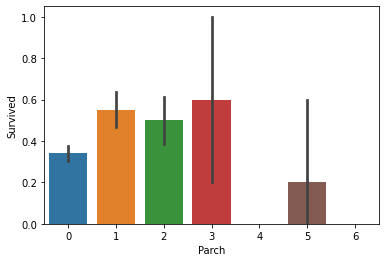

In [18]:
sns.barplot(x='Parch', y='Survived', data=train_data)

Penumpang dengan jumlah anak atau orang tua kurang dari 4 memiliki peluang selamat lebih tinggi

### Umur penumpang terhadap keselamatan

Untuk melihat pengaruh umur terhadap keselamatan, kita perlu mengelompokkan umur terlebih dahulu

In [19]:
# pertama kita akan mengisi NaN dengan -0.5
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)

# membuat bins untuk pengelompokkan umur
bins = [-1, 0, 5, 12, 18, 65, np.inf]

# membuat label pengelompokkan umur
labels = ['Unknown', 'Baby', 'Kids', 'Teen', 'Adult', 'Elderly']

# menambah kolom baru AgeGroup ke data train dan test
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins, labels=labels)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins, labels=labels)

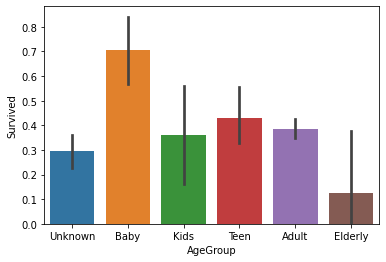

In [20]:
sns.barplot(x='AgeGroup', y='Survived', data=train_data)

Bayi memiliki peluang selamat lebih besar dibandingkan dengan kelompok umur lainnya

## 4. Pembersihan (cleaning) data 

Kita akan melakukan pembersihan data sehingga data bisa digunakan untuk tahap berikutnya

Seperti yang sudah disebutkan sebelumnya, kita akan drop kolom Cabin karena terlalu banyak data yang null

In [21]:
train_data.drop(columns=['Cabin'], inplace=True)

In [22]:
test_data.drop(columns=['Cabin'], inplace=True)

In [23]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.45,S,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,Adult
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,Adult


Kemudian kita bisa drop Ticket karena tidak memiliki pengaruh ke peluang selamat juga

In [24]:
train_data.drop(columns=['Ticket'], inplace=True)

In [25]:
test_data.drop(columns=['Ticket'], inplace=True)

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult


In [27]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Adult
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Adult


Lalu mengisi nilai null pada Embarked dengan S pada data train karena nilai tersebut paling sering muncul

In [28]:
train_data = train_data.fillna({'Embarked': 'S'})

In [29]:
train_data['Embarked'].isnull().sum()

0

In [30]:
temp0, temp1 = train_data, test_data

Sekarang kita akan mengisi nilai kosong pada kolom umur dengan memprediksi nilai umur berdasarkan title yang digunakan

In [31]:
# train_data dan test_data saya masukkan ke dalam array untuk mempermudah saat proses preprocessing data nanti
datasets = [train_data, test_data]

for dataset in datasets:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# pd.crosstab(train_data['Title'], train_data['Sex'])

In [32]:
# train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,Adult,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,Adult,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.45,S,Unknown,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,Adult,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,Adult,Mr


In [33]:
# test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,8.0500,S,Unknown,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Adult,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Adult,Mr
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,8.0500,S,Unknown,Mr
417,1309,3,"Peter, Master. Michael J",male,-0.5,1,1,22.3583,C,Unknown,Master


In [34]:
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Sekarang kita perlu mengganti title menjadi lebih umum dan mengelompokkannya agar lebih mudah dipahami

In [35]:

for data in datasets:
    # mengganti title yang jarang muncul dengan title baru 'Rare'
    data['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
    
    # mengganti title yang berhubungan dengan kerajaan dengan title baru 'Royal'
    data['Title'] = data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    
    # memperbaiki typo atau kesalahan pada penulisan title
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')


In [36]:
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,2,19
Royal,1,1


In [37]:
datasets[0].tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,Adult,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,Adult,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.45,S,Unknown,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,Adult,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,Adult,Mr


In [38]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,Adult,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,Adult,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.45,S,Unknown,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,Adult,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,Adult,Mr


In [39]:
# cek peluang selamat penumpang berdasarkan titlenya
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


Sekarang kita akan mapping title penumpang menjadi angka numerik

In [40]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for data in datasets:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)

In [41]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,Adult,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,Adult,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.45,S,Unknown,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,Adult,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,Adult,1


In [42]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,8.0500,S,Unknown,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Adult,6
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Adult,1
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,8.0500,S,Unknown,1
417,1309,3,"Peter, Master. Michael J",male,-0.5,1,1,22.3583,C,Unknown,4


In [43]:
train_data['AgeGroup'].value_counts()

Adult      567
Unknown    177
Teen        70
Baby        44
Kids        25
Elderly      8
Name: AgeGroup, dtype: int64

In [44]:
# isi umur yang hilang berdasarkan title nya
mr_age = train_data[train_data["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train_data[train_data["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train_data[train_data["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_data[train_data["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train_data[train_data["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train_data[train_data["Title"] == 6]["AgeGroup"].mode() #Adult


In [45]:
train_data['AgeGroup'].value_counts()

Adult      567
Unknown    177
Teen        70
Baby        44
Kids        25
Elderly      8
Name: AgeGroup, dtype: int64

In [46]:
age_title_mapping = {1: "Teen", 2: "Teen", 3: "Adult", 4: "Baby", 5: "Elderly", 6: "Adult"}

In [47]:
for x in range(len(train_data["AgeGroup"])):
    if train_data["AgeGroup"][x] == "Unknown":
        train_data["AgeGroup"][x] = age_title_mapping[train_data["Title"][x]]
        
for x in range(len(test_data["AgeGroup"])):
    if test_data["AgeGroup"][x] == "Unknown":
        test_data["AgeGroup"][x] = age_title_mapping[test_data["Title"][x]]

In [48]:
train_data['AgeGroup'].value_counts()

Adult      585
Teen       225
Baby        48
Kids        25
Elderly      8
Unknown      0
Name: AgeGroup, dtype: int64

Sekarang saatnya kita mapping AgeGroup jadi bernilai numerik

In [49]:
age_map = {'Baby': 1, 'Kids': 2, 'Teen': 3, 'Adult': 4, 'Elderly': 5}

train_data['AgeGroup'] = train_data['AgeGroup'].map(age_map)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_map)

In [50]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,4.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4.0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4.0,1


Sekarang kita akan drop feature Name

In [51]:
for data in datasets:
    data.drop(['Name'], axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,male,22.0,1,0,7.2500,S,4.0,1
1,2,1,1,female,38.0,1,0,71.2833,C,4.0,3
2,3,1,3,female,26.0,0,0,7.9250,S,4.0,2
3,4,1,1,female,35.0,1,0,53.1000,S,4.0,3
4,5,0,3,male,35.0,0,0,8.0500,S,4.0,1


Lalu kita akan mapping Sex menjadi numerik

In [52]:
for data in datasets:
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,22.0,1,0,7.2500,S,4.0,1
1,2,1,1,1,38.0,1,0,71.2833,C,4.0,3
2,3,1,3,1,26.0,0,0,7.9250,S,4.0,2
3,4,1,1,1,35.0,1,0,53.1000,S,4.0,3
4,5,0,3,0,35.0,0,0,8.0500,S,4.0,1


Kita juga akan mapping Embarked menjadi numerikal

In [54]:
embark_map = {'S': 1, 'C':2, 'Q':3}
for data in datasets:
    data['Embarked'] = data['Embarked'].map(embark_map)

In [55]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,22.0,1,0,7.2500,1,4.0,1
1,2,1,1,1,38.0,1,0,71.2833,2,4.0,3
2,3,1,3,1,26.0,0,0,7.9250,1,4.0,2
3,4,1,1,1,35.0,1,0,53.1000,1,4.0,3
4,5,0,3,0,35.0,0,0,8.0500,1,4.0,1


Karena terdapat nilai kosong pada kolom Fare di data test maka perlu kita isi dengan median

In [56]:
test_data['Fare'].isna().sum()

1

In [57]:
# mengisi nilai Fare yang kosong dengan mean Fare kelas penumpangnya
for x in range(len(test_data["Fare"])):
    if pd.isnull(test_data["Fare"][x]):
        pclass = test_data["Pclass"][x] #Pclass = 3
        test_data["Fare"][x] = round(train_data[train_data["Pclass"] == pclass]["Fare"].mean())

<ipython-input-57-f95c9cbe6d2a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Fare"][x] = round(train_data[train_data["Pclass"] == pclass]["Fare"].mean())


In [58]:
test_data['Fare'].isna().sum()

0

In [59]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,22.0,1,0,7.2500,1,4.0,1
1,2,1,1,1,38.0,1,0,71.2833,2,4.0,3
2,3,1,3,1,26.0,0,0,7.9250,1,4.0,2
3,4,1,1,1,35.0,1,0,53.1000,1,4.0,3
4,5,0,3,0,35.0,0,0,8.0500,1,4.0,1


In [60]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,892,3,0,34.5,0,0,7.8292,3,4.0,1
1,893,3,1,47.0,1,0,7.0000,1,4.0,3
2,894,2,0,62.0,0,0,9.6875,3,4.0,1
3,895,3,0,27.0,0,0,8.6625,1,4.0,1
4,896,3,1,22.0,1,1,12.2875,1,4.0,3


## 6. Pembuatan Model KNN

Pada bagian ini kita akan mulai membangun model KNN

Pertama kita split train data menjadi train dan validation dengan banyak data validation sebanyak 20% data train

In [61]:
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

In [62]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Setelah itu kita buat model KNN nya

In [63]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
accuracy = accuracy_score(y_pred, y_val)
print(accuracy)

0.7374301675977654


In [64]:
print("Model KNN ini mampu memprediksi dengan akurasi sebesar {0:.2f}%".format(accuracy * 100))

Model KNN ini mampu memprediksi dengan akurasi sebesar 73.74%


## Test model

Saatnya kita test model KNN dengan data test

In [65]:
X_test = test_data.drop(['PassengerId'], axis=1)
y_test = knn.predict(X_test)
# accuracy = accuracy_score(y_test, y_val)
# print(accuracy)

## Extra: Buat output csv untuk kompetisi Kaggle

In [66]:
ids = test_data['PassengerId']
y = y_test

output = pd.DataFrame({'PassengerId': ids, 'Survived': y})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [67]:
output.to_csv('submission.csv', index=False)

## Referensi
<br>
<a href=https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner>
Titanic Survival Predictions (Beginner)</a>